In [1]:
%matplotlib inline

In [73]:
import matplotlib.pyplot as plt
import nbodykit.lab as nb
import numpy as np

In [ ]:
c   = ['k', 'r', 'b', 'purple', 'orange', 'olive']
ls  = ['-', '--', '-.', ':', '-', '--']
mk  = ['.', '^', 'v', 'x', 'o', 's']
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15, 5), sharey='row', sharex=True)
plt.subplots_adjust(hspace=0., wspace=0)
ax = ax.flatten()
# ax = [ax]

for j,CAP in enumerate(['NGC', 'SGC']): # 'sgc'
    path = '/home/mehdi/data/eboss/v7/results_'+CAP+'_all/'
    wsystot      = nb.ConvolvedFFTPower.load(path + 'pk_'+CAP+'_v7_512.json')
    wnnzab       = nb.ConvolvedFFTPower.load(path + 'pk_'+CAP+'_v7_wnnz_ab_512.json')
    wnnzp       = nb.ConvolvedFFTPower.load(path + 'pk_'+CAP+'_v7_wnnz_plain_512.json')    
    #nocorrection = nb.ConvolvedFFTPower.load(path + 'pk_'+CAP+'_v7_wosys_512.json')
    #pks = [nocorrection,    wsystot,  wnnzab, wnnzp]
    #ttl = ['No correction', 'Systot', 'NN', 'NN wo FS']
    pks = [wsystot, wnnzp, wnnzab]
    ttl = ['Systot', 'NN-plain', 'NN']

    for i,data in enumerate(pks):  
        #print('k', np.diff(data.poles['k']))
        
        err = 1.e-5*data.poles['power_0'].real/(0.5*data.poles['modes'])**0.5
        ax[j].errorbar(data.poles.coords['k'], 1.e-5*(data.poles['power_0'].real-data.attrs['shotnoise']),
                       yerr=err,
                   label=ttl[i], ls=ls[i], c=c[i], marker=mk[i], alpha=0.5)
        #ax[j].plot(data.poles['k'], 1.e-5*(data.poles['power_0'].real-data.attrs['shotnoise']),
        #          label=ttl[i], ls=ls[i], c=c[i], marker=mk[i], alpha=0.8)
    #for i,data in enumerate(pks):    
    #    ax[2+j].errorbar(data.poles['k'], 1.e-5*data.poles['power_2'].real,
    #                label=ttl[i], ls=ls[i], c=c[i], marker=mk[i], alpha=0.8)        
    # j = 0, 1
    Pkmock = np.loadtxt('/home/mehdi/data/eboss/v5/Power_Spectrum_DR16QSO_'+CAP+'_av.txt', usecols=(0, 1))
    ax[j].plot(Pkmock[:, 0], 1.e-5*Pkmock[:, 1], c='grey')
    ax[j].set_xscale('log')
    #ax[j].set_yscale('log')
    ax[j].set_xlabel(r'k [h/Mpc]')
    ax[j].set_ylim(-0.5, 2.)
    ax[j].set_xlim(0.0005, 0.25)
    #ax[2+j].set_ylim(-3, 1)
    #ax[2+j].set_xlabel(r'k [h/Mpc]')
    ax[j].set_title(CAP + '  V7 - nside=512')
    if j==0:
        ax[j].set_ylabel(r'10$^{-5}$  P$_{0}$(k) [Mpc/h]$^{3}$')
        #ax[2+j].set_ylabel(r'10$^{-5}$ P$_{2}$(k) [Mpc/h]$^{3}$')
    #if j == 1:ax[j].legend(bbox_to_anchor=(1.1, 1.1))
    ax[1].legend(bbox_to_anchor=(1.3, 1.1))
#fig.delaxes(ax[1])
#fig.delaxes(ax[3])

for a in ax:a.grid()
fig.align_labels()   
#plt.savefig('P0_P2.pdf', bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
for j,CAP in enumerate(['NGC', 'SGC']):    
    #CAP = 'SGC'
    path = '/home/mehdi/data/eboss/v7/results_'+CAP+'_all/'
    wnnzp = nb.ConvolvedFFTPower.load(path + 'pk_'+CAP+'_v7_512.json') 
    # use the same number of mu wedges and number of multipoles
    Nmu = 9
    mu_edges = np.linspace(0., 1., Nmu+1, endpoint=True)
    #mu_edges = np.array([0., 0.5, 1.0])
    # get a BinnedStatistic holding the P(k,mu) wedges
    Pkmu = wnnzp.to_pkmu(mu_edges, 4)
    # plot each mu bin
    for i in range(Pkmu.shape[1]):
        Pk = Pkmu[:,i] # select the ith mu bin
        label = r'$\mu$=%.2f' % (Pkmu.coords['mu'][i])
        ax[j].loglog(Pk['k'], (Pk['power'].real-0.0*Pk.attrs['shotnoise']), label=label, 
                  color=plt.cm.jet(i/9))

    # format the axes
    ax[j].legend(title=CAP, loc=0, ncol=2)
    ax[j].set_xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
    ax[j].set_ylabel(r"$P(k, \mu)$ [$h^{-3}\mathrm{Mpc}^3$]")
    ax[j].set_xlim(0.0005, 0.25)
    ax[j].set_ylim(1.e4,   3.e5)

Swap weights

In [1]:
from eboss_tools import swap_weights_plain

In [ ]:
swap_weights_plain()

In [1]:
from eboss_tools import swap_weights

camb is not installed!


In [ ]:
swap_weights()

The maps that were selected with the feature selection

In [ ]:
from eboss_tools import plot_ablation_selected

In [ ]:
plot_ablation_selected()

Look at the systematic maps. Transform them if neccessary.

In [1]:
from eboss_tools import plot_systematics

camb is not installed!


logsky_g             : 1.204e+00: [0.03040611 0.16904161 0.22655502 2.26015941]
logsky_r             : 6.613e-01: [0.36730876 0.56068309 0.61206264 1.34667484]
logsky_i             : 4.154e-01: [0.58296669 0.83456462 0.89718643 1.37816136]
logsky_z             : 2.392e-01: [0.97115135 1.31485303 1.38890711 1.8335799 ]
logairmass           : 1.178e+00: [0.00082834 0.03637222 0.06482959 0.28738073]
logebv               : 5.307e-02: [-2.42871556 -1.69905974 -1.50233526 -0.35119966]
logdepth_g           : 6.450e-01: [-0.76390246 -0.36405916 -0.30955164  0.26228854]
logdepth_r           : 5.493e-01: [-0.59247022 -0.19829803 -0.14419614  0.35184604]
logdepth_i           : 4.178e-01: [-0.3375187  -0.01080822  0.04384189  0.45359632]
logdepth_z           : 3.997e-01: [0.16825206 0.59401472 0.64723245 1.07981426]
psf_g                : 8.727e-01: [0.51418822 1.31156235 1.43315143 3.2055604 ]
psf_r                : 6.964e-01: [0.44658037 1.19576599 1.31400462 3.37326678]
psf_i                : 6

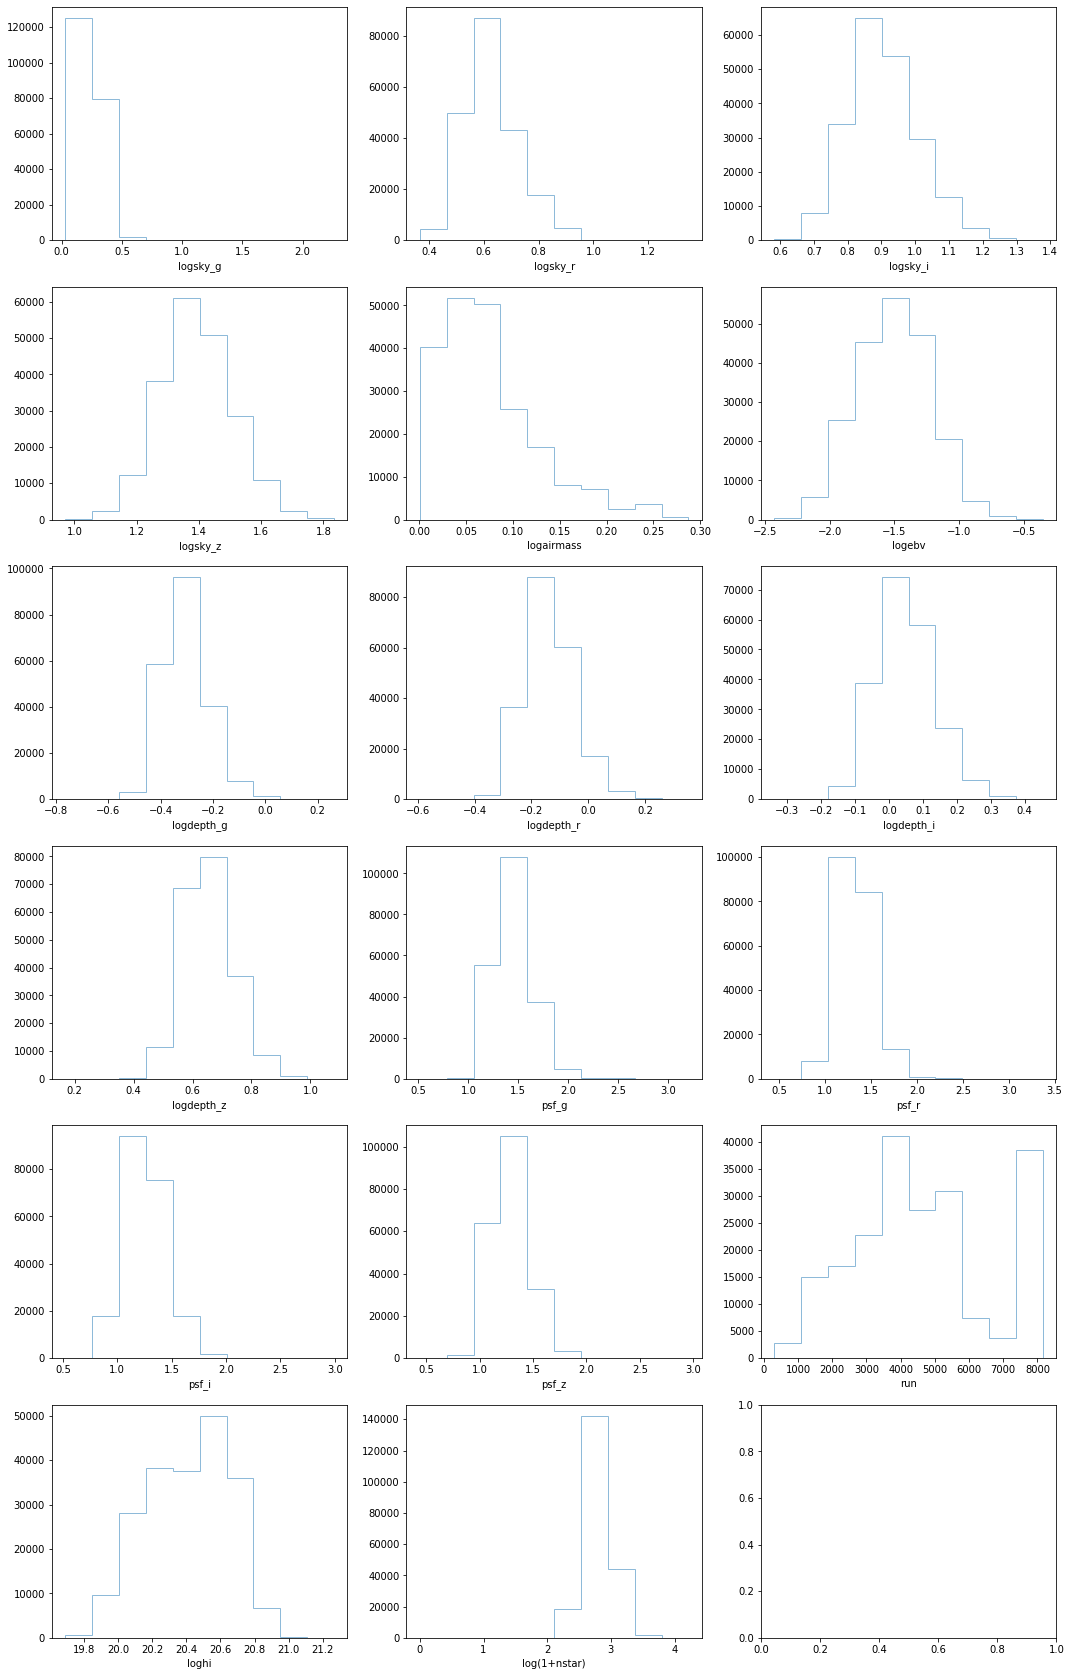

In [2]:
transformed = plot_systematics(sysmap='/home/mehdi/data/eboss/sysmaps/SDSS_HI_imageprop_nside256.h5',
                               return_pd=True)

In [3]:
transformed.dropna().describe().T

,count,mean,std,min,25%,50%,75%,max
logsky_g,206956.0,0.237347,0.092629,0.030406,0.169042,0.226555,0.295511,2.260159
logsky_r,206956.0,0.628288,0.098491,0.367309,0.560683,0.612063,0.687333,1.346675
logsky_i,206956.0,0.906546,0.101886,0.582967,0.834565,0.897186,0.968747,1.378161
logsky_z,206956.0,1.394627,0.114990,0.971151,1.314853,1.388907,1.467647,1.833580
logairmass,206956.0,0.074968,0.052751,0.000828,0.036372,0.064830,0.097509,0.287381
logebv,206956.0,-1.502147,0.278165,-2.428716,-1.699060,-1.502335,-1.305762,-0.351200
logdepth_g,206956.0,-0.303749,0.084040,-0.763902,-0.364059,-0.309552,-0.254109,0.262289
logdepth_r,206956.0,-0.137066,0.084966,-0.592470,-0.198298,-0.144196,-0.084943,0.351846
logdepth_i,206956.0,0.049719,0.084711,-0.337519,-0.010808,0.043842,0.103073,0.453596
logdepth_z,206956.0,0.653874,0.084142,0.168252,0.594015,0.647232,0.707408,1.079814


In [4]:
transformed.to_hdf('/home/mehdi/data/eboss/sysmaps/SDSS_WISE_imageprop_HI_transformed_nside256.h5', 
                  'maps')

Split into 5 folds, 4 redshifts

In [1]:
from eboss_tools import preparev7

camb is not installed!


In [2]:
preparev7(dataname='/home/mehdi/data/eboss/sysmaps/SDSS_HI_imageprop_nside256.h5',
         transformed=False, nside=256)

len of gal cats 1
num of gal obj 218202
going to apply z-cuts : [0.8, 1.508088732762684]
num of gal obj after cut 109024
projecting into a healpix map with nside of 256
len of gal cats 1
num of gal obj 5550232
projecting into a healpix map with nside of 256
wrote /home/mehdi/data/eboss/v7/ngal_features_NGC_low.hp256.fits
wrote /home/mehdi/data/eboss/v7/mask_NGC_low.hp256.fits
wrote /home/mehdi/data/eboss/v7/frac_NGC_low.hp256.fits
wrote /home/mehdi/data/eboss/v7/ngal_features_NGC_low.hp256.5r.npy
len of gal cats 1
num of gal obj 218202
going to apply z-cuts : [1.508088732762684, 2.2]
num of gal obj after cut 109177
projecting into a healpix map with nside of 256
len of gal cats 1
num of gal obj 5550232
projecting into a healpix map with nside of 256
wrote /home/mehdi/data/eboss/v7/ngal_features_NGC_high.hp256.fits
wrote /home/mehdi/data/eboss/v7/mask_NGC_high.hp256.fits
wrote /home/mehdi/data/eboss/v7/frac_NGC_high.hp256.fits
wrote /home/mehdi/data/eboss/v7/ngal_features_NGC_high.hp256

In [8]:
import fitsio as ft
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from glob import glob

In [9]:
files =  glob('/home/mehdi/data/eboss/v7/ngal_features_*.hp512.fits')
files

['/home/mehdi/data/eboss/v7/ngal_features_NGC_0.8.hp512.fits',
 '/home/mehdi/data/eboss/v7/ngal_features_NGC_1.1.hp512.fits',
 '/home/mehdi/data/eboss/v7/ngal_features_NGC_1.4.hp512.fits',
 '/home/mehdi/data/eboss/v7/ngal_features_NGC_1.6.hp512.fits',
 '/home/mehdi/data/eboss/v7/ngal_features_NGC_1.9.hp512.fits',
 '/home/mehdi/data/eboss/v7/ngal_features_SGC_0.8.hp512.fits',
 '/home/mehdi/data/eboss/v7/ngal_features_SGC_1.1.hp512.fits',
 '/home/mehdi/data/eboss/v7/ngal_features_SGC_1.4.hp512.fits',
 '/home/mehdi/data/eboss/v7/ngal_features_SGC_1.6.hp512.fits',
 '/home/mehdi/data/eboss/v7/ngal_features_SGC_1.9.hp512.fits']

In [51]:
pcc_boost = {}
pcc_all   = {}
for i,file_i in enumerate(files):
    cap = file_i.split('/')[-1].split('_')[2]
    red = file_i.split('/')[-1].split('_')[3][:3]
    myname = '_'.join((cap, red))

    data = ft.read(file_i, lower=True)
    feat = data['features'].T
    nlbl = data['label']
    nran = data['fracgood']    
    #ngal = data['label']*data['fracgood']
    #mask = np.ones_like(nran)    
    pcc_mine = []
    for j, sys_j in enumerate(feat):
        pcc_mine.append(pearsonr(sys_j, nlbl)[0])
        print('.', end=' ')
    pcc_all[myname] = pcc_mine
    
    if red == '0.8':
        dummy_sys  = sys_j
        pcc_boots  = []
        for _ in range(100):
            pcc_boots.append(pearsonr(sys_j, np.random.choice(nlbl, replace=False, size=nlbl.size))[0])
        pcc_boost[cap] = pcc_boots
    print('')    

. . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . 


In [25]:
import numpy as np

In [20]:
import sys
sys.path.append('/home/mehdi/github/LSSutils')
from LSSutils.catalogs.datarelease import cols_eboss_v7_qso as featnames

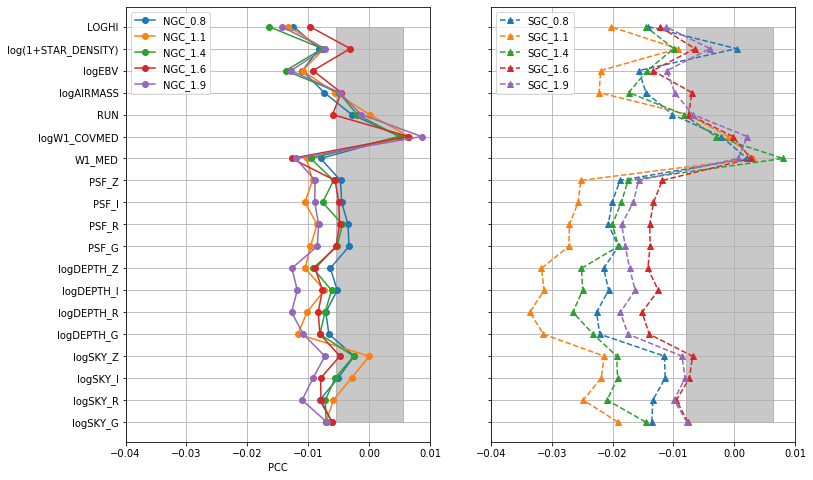

In [52]:
fig, ax = plt.subplots(ncols=2, figsize=(12,8), sharey=True)
for name_i in pcc_all.keys():
    #if 'low' in name_i or 'high' in name_i:
    if 'NGC' in name_i:
        cap='NGC'
        marker='o'
        ls='-'
        j = 0
    elif 'SGC' in name_i:
        cap='SGC'
        marker='^'
        ls='--'
        j = 1
    else:
        marker='.'
    #if 'low' in name_i:
    #    color='r'
    #elif 'high' in name_i:
    #    color='k'
    #else:
    #    color='b'
    ax[j].plot(pcc_all[name_i], featnames, label=name_i, marker=marker, linestyle=ls)
    ax[j].fill_betweenx(x1=np.min(pcc_boost[cap]),
                  x2=np.max(pcc_boost[cap]), 
                  y=np.arange(len(featnames)),
                  color='grey', alpha=0.1)



for axi in ax:
    axi.legend()#bbox_to_anchor=(1.3, 1.))
    axi.set_xlim(-0.04, 0.01)
    axi.grid(True)
    
ax[0].set_xlabel('PCC')
plt.show()    